### banco de dados fictício em que cada linha representa um carro à venda 
### em uma loja online. Os carros são de diversos donos diferentes, 
### e alguns desses carros foram vendidos e outros não.

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


### modifica o dataset

In [2]:
# sold para binario
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.sold = dados.sold.map(a_trocar)

# nova feature idade do carro
from datetime import datetime

ano_atual = datetime.today().year
dados['age'] = ano_atual - dados.model_year

# nova feature quilometragem por ano
dados ['km_per_year'] = dados.mileage_per_year * 1.60934

# apaga as colunas n utilizadas
dados = dados.drop(columns = ["Unnamed: 0", "mileage_per_year", "model_year"], axis = 1)
dados.head()

,price,sold,age,km_per_year
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


## separa os dados

In [3]:
x = dados[["price", "age", "km_per_year"]]
y = dados["sold"]

## classificamos com o LinearSVC

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
# o metodo utiliza a random do np 
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 57.88%


/home/pedro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## criamos a baseline com o DummyClassifier

In [5]:
from sklearn.dummy import DummyClassifier

# a estratégia utilizada pelo DummyClassifier é estratificada ou (stratified), 
# ou seja, proporcional; se temos 30% de itens da classe 0 e 70% da classe 1, 
# o estimador manterá esse padrão em sua classificação.
dummy = DummyClassifier(strategy = 'stratified' , random_state = SEED)
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy usando stratified foi %.2f%%" % acuracia)

A acurácia do dummy usando stratified foi 51.24%


## classificamos com o SVC

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

/home/pedro/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


# utilizando Arvores de Decisão
#### para compreender como as decisões estão sendo tomadas.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


## visualização gráfica do modelo

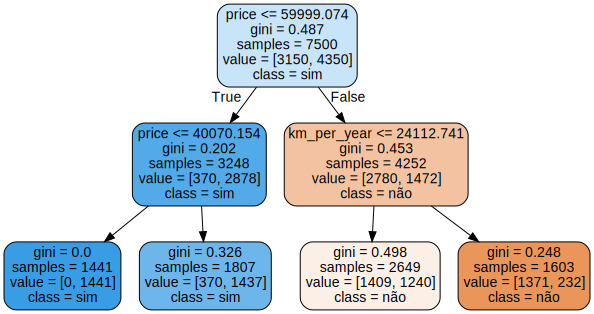

In [8]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

#### O samples nos mostra quantos dados são enquadrados em determinada situação. 
#### No primeiro quadro ,o valor de samples será de 7500, pois essa é a quantidade total de dados 
#### que disponibilizamos

#### Para medir se vale a pena quebrar a árvore em dois pedaços em 
#### cada uma das decisões, o algorítimo utiliza diversos parâmetros. Um deles é o gini